# Psychometric function exercise

In [3]:
import pandas as pd
import numpy as np
import pylab
from scipy.optimize import curve_fit

### Create the dataset

In [4]:
df = pd.DataFrame({'intensivity':[5,10,15,20,25,30],'correct_resp': [12,11,19,27,30,30]})
df['incorr_resp'] = 30-df['correct_resp']
df['prob_corr'] = df['correct_resp']/30
df

intensivity  correct_resp  incorr_resp  prob_corr
0            5            12           18   0.400000
1           10            11           19   0.366667
2           15            19           11   0.633333
3           20            27            3   0.900000
4           25            30            0   1.000000
5           30            30            0   1.000000

In [5]:
def sigmoid(x, x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return y


[10.513001    0.17401856]


/Users/hadilhoussin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


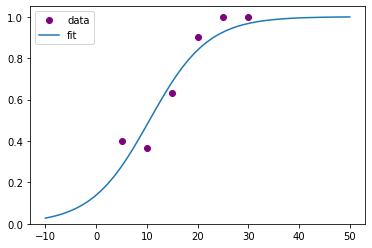

In [6]:
xdata = df['intensivity']
ydata = df['prob_corr']

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)

x = np.linspace(-10, 50, 50)
y = sigmoid(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data',color='purple')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()